# Python Notebook: Problem Sheet 1 - Q6

In [2]:
# Standard scientific Python imports
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.linalg import eigh # eigendecomposition for symmetric matrices
from numpy.linalg import svd # SVD

# Load the crabs dataset
url = 'https://vincentarelbundock.github.io/Rdatasets/csv/MASS/crabs.csv'
crabs = pd.read_csv(url)
X = crabs[['FL', 'RW', 'CL', 'CW', 'BD']]
X.head()

,FL,RW,CL,CW,BD
0,8.1,6.7,16.1,19.0,7.0
1,8.8,7.7,18.1,20.8,7.4
2,9.2,7.8,19.0,22.4,7.7
3,9.6,7.9,20.1,23.1,8.2
4,9.8,8.0,20.3,23.0,8.2


In [5]:
# Compute covariance matrix
n = X.shape[0]
X_centered = X - X.mean(axis=0) # Center data
S = 1/(n-1)* X_centered.T @ X_centered # Sample covariance matrix
print('Sample covariance matrix S:\n', S)

Sample covariance matrix S:
            FL         RW         CL         CW         BD
FL  12.217297   8.158045  24.356677  26.550801  11.822581
RW   8.158045   6.622078  16.354662  18.239640   7.836659
CL  24.356677  16.354662  50.679919  55.761377  23.971389
CW  26.550801  18.239640  55.761377  61.967678  26.091867
BD  11.822581   7.836659  23.971389  26.091867  11.729065


In [13]:
(eigval, eigvec) = eigh(S)
eigval = eigval[::-1] # decreasing order
eigvec = eigvec[:,::-1] # matrix is 2D

print('\n Eigenvalues:\n', eigval)
print('\n Eigenvectors:\n', eigvec)

# Note that the eigenvectors are not exactly the same as with the PCA function - why? Signs don't matter

# Using the SVD decomposition of X 
from scipy import linalg
(U_svd, singval_svd, V_svd) = svd(X_centered)
print('\nV (SVD):\n', V_svd.T)
print('\n Singular values (SVD):\n', singval_svd)
print('\n Singular values^2 / (n-1):\n', 1/(n-1)*singval_svd**2)


 Eigenvalues:
 [1.40705719e+02 1.29683676e+00 1.00026913e+00 1.35299319e-01
 7.79142291e-02]

 Eigenvectors:
 [[-0.28898096 -0.32325003  0.5071698   0.73429069  0.12488158]
 [-0.19728237 -0.86471586 -0.41413564 -0.14830922 -0.14086231]
 [-0.5993986   0.19822633  0.17532992 -0.14359407 -0.74166556]
 [-0.66165498  0.28797897 -0.4913755   0.12562819  0.4712202 ]
 [-0.28373171 -0.1598447   0.54688207 -0.63436572  0.43868682]]

V (SVD):
 [[ 0.28898096  0.32325003 -0.5071698   0.73429069  0.12488158]
 [ 0.19728237  0.86471586  0.41413564 -0.14830922 -0.14086231]
 [ 0.5993986  -0.19822633 -0.17532992 -0.14359407 -0.74166556]
 [ 0.66165498 -0.28797897  0.4913755   0.12562819  0.4712202 ]
 [ 0.28373171  0.1598447  -0.54688207 -0.63436572  0.43868682]]

 Singular values (SVD):
 [167.33331418  16.06457327  14.10863411   5.18888856   3.9376302 ]

 Singular values^2 / (n-1):
 [1.40705719e+02 1.29683676e+00 1.00026913e+00 1.35299319e-01
 7.79142291e-02]


In [14]:
Z_pca = X_centered @ V_svd.T
# Z_pca = X_centered @ eigvec.T
Z_pca.columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5']
Z_pca

,PC1,PC2,PC3,PC4,PC5
0,-26.464575,-0.576534,-0.611568,-0.028681,0.496585
1,-23.561737,-0.336420,-0.237388,0.022209,-0.016521
2,-21.743190,-0.711865,0.065497,0.182556,0.237405
3,-20.343507,-0.835805,-0.218298,0.074244,0.006637
4,-20.212268,-0.695531,-0.362522,0.164990,-0.177928
...,...,...,...,...,...
195,15.969744,2.555655,-0.111081,0.452288,-0.100215
196,17.095597,1.631154,-0.724437,0.288955,0.559231
197,17.816538,1.530292,-0.789291,0.380310,-0.047002
198,19.174957,1.318532,-0.689002,0.736454,0.475453


<Figure size 432x288 with 0 Axes>

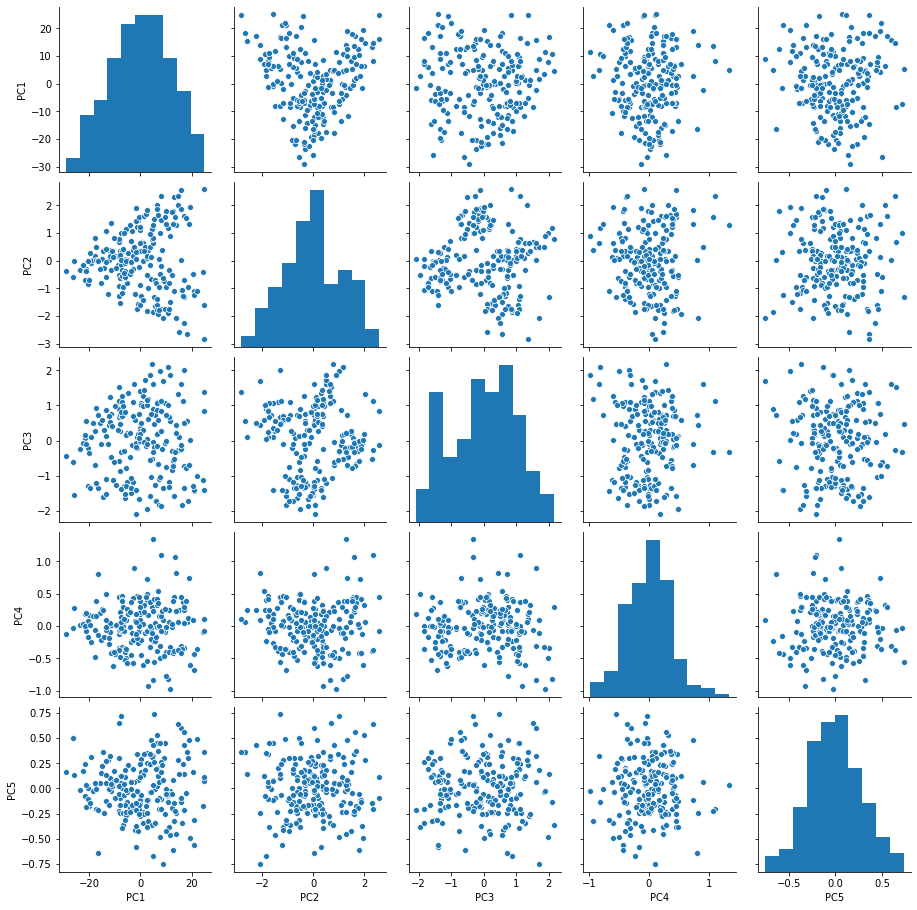

In [19]:
plt.figure()
sns.pairplot(data=Z_pca)

In [20]:
# Compute Gram matrix
B = X_centered @ X_centered.T
# Check size (n by n)
B.shape

(eigval_B, eigvec_B) = eigh(B)
eigval_B = eigval_B[::-1]
eigvec_B = eigvec_B[:,::-1]

In [21]:
print('First 5 Eigenvalues of B\n', eigval_B[0:5]) # other eigenvalues are zero
print('\nFirst 5 Eigenvalues of B/(n-1) (Same as that of S)\n', eigval_B[0:5]/(n-1)) # other eigenvalues are zero

First 5 Eigenvalues of B
 [2.80004380e+04 2.58070514e+02 1.99053557e+02 2.69245644e+01
 1.55049316e+01]

First 5 Eigenvalues of B/(n-1) (Same as that of S)
 [1.40705719e+02 1.29683676e+00 1.00026913e+00 1.35299319e-01
 7.79142291e-02]


In [23]:
#eigvec_B[:,0:5]

Z_pca2 = eigvec_B[:,0:5] @ np.diag(np.sqrt(np.abs(eigval_B[0:5])))
Z_pca2 = pd.DataFrame(Z_pca2, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])
Z_pca2.head()

,PC1,PC2,PC3,PC4,PC5
0,26.464575,-0.576534,-0.611568,-0.028681,0.496585
1,23.561737,-0.336420,-0.237388,0.022209,-0.016521
2,21.743190,-0.711865,0.065497,0.182556,0.237405
3,20.343507,-0.835805,-0.218298,0.074244,0.006637
4,20.212268,-0.695531,-0.362522,0.164990,-0.177928


<Figure size 432x288 with 0 Axes>

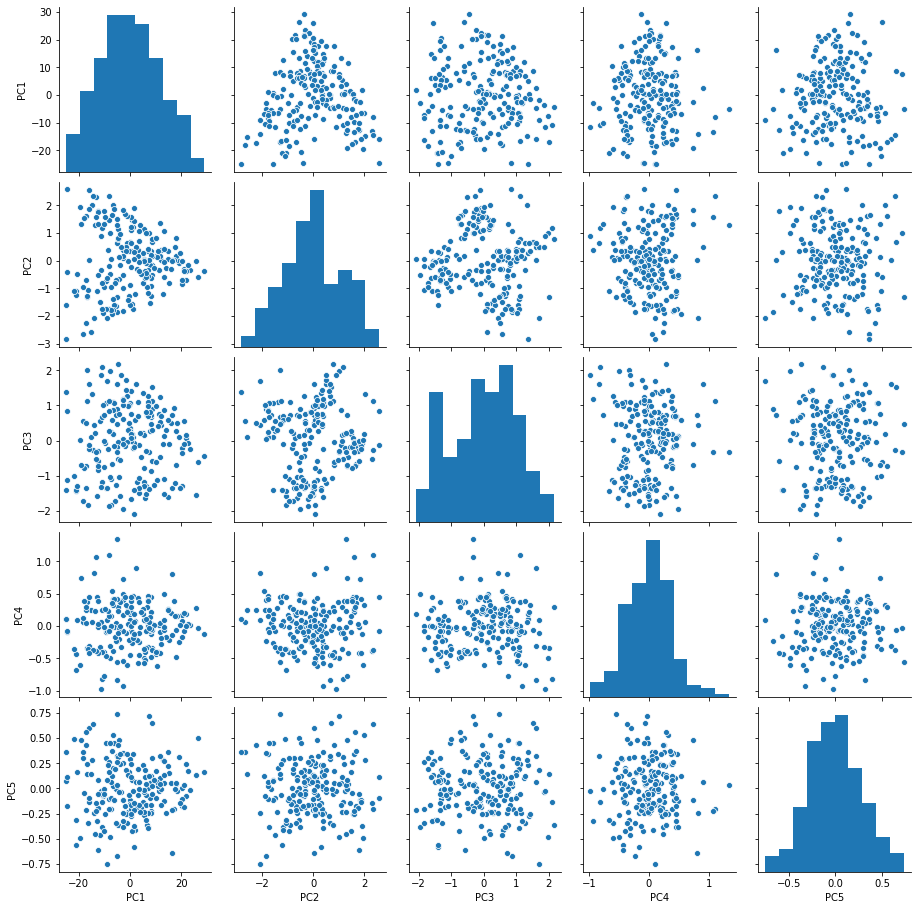

In [24]:
plt.figure()
sns.pairplot(data=Z_pca2);